   indep_var_1  indep_var_2  indep_var_3  indep_var_4  indep_var_5   
0   126.567714   156.881730    76.237133   172.961489    64.200057  \
1   123.068797   119.162731    39.341009   132.848510    46.226182   
2   127.756988    91.247561    41.317294   171.263008    77.902859   
3   109.597034   169.039691    42.307597   105.855933    46.586683   
4   111.411523   131.769287    14.462603    80.493040    84.719217   

   indep_var_6  indep_var_7  indep_var_8  indep_var_9  indep_var_10   
0   119.244458    77.009464   106.092762   111.975612     78.798146  \
1   139.868908    84.029849   123.697787   106.203628     53.055649   
2   104.594522   107.279469   105.600725    98.849422     90.477445   
3   145.718906   110.849806   139.551425   117.511775     62.558516   
4   118.309070    35.932072   138.485947   128.401495     61.551158   

   dependent_var  
0     354.353373  
1     557.348552  
2     397.389025  
3     619.990105  
4     613.269270  
<class 'pandas.core.frame.DataFrame'>


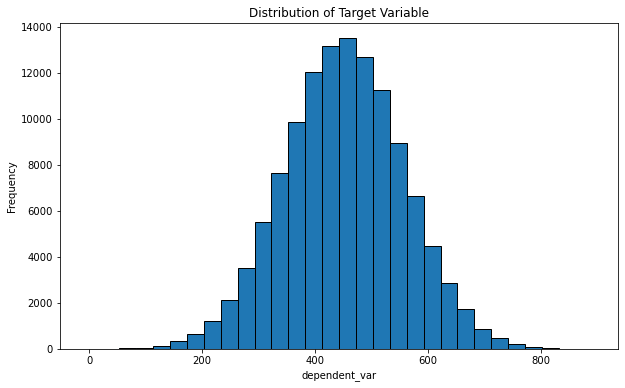

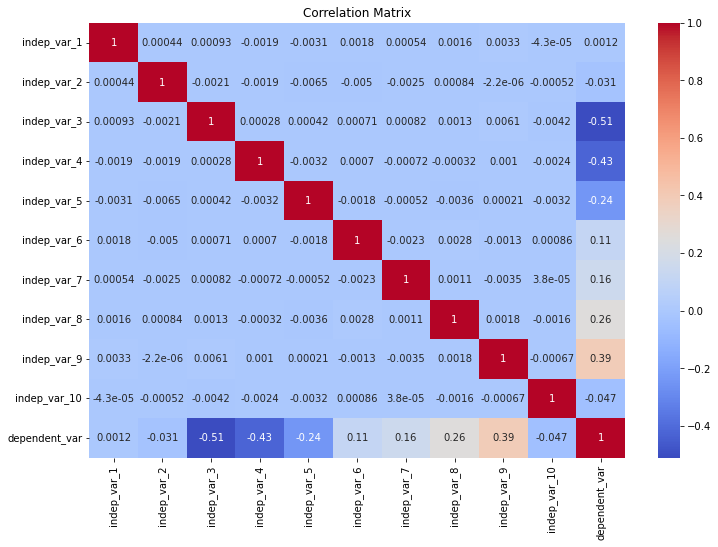

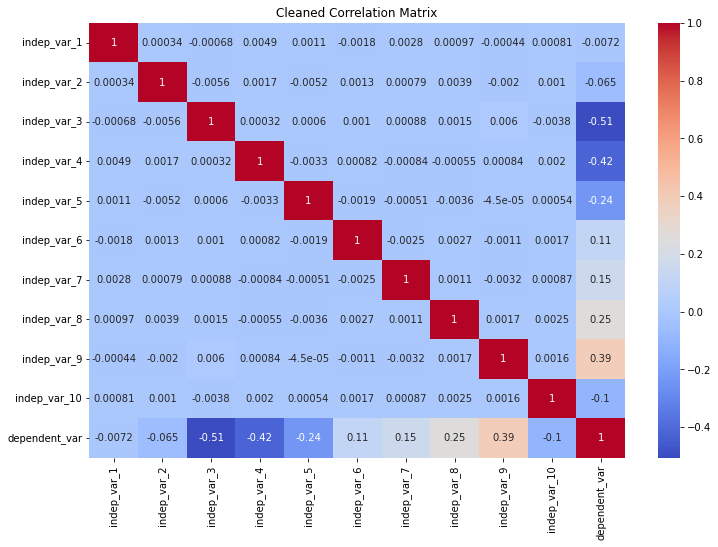

                            OLS Regression Results                            
Dep. Variable:          dependent_var   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                 3.780e+04
Date:                Thu, 29 May 2025   Prob (F-statistic):               0.00
Time:                        11:39:02   Log-Likelihood:            -6.4398e+05
No. Observations:              120000   AIC:                         1.288e+06
Df Residuals:                  119989   BIC:                         1.288e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          314.1455      2.602    120.745   

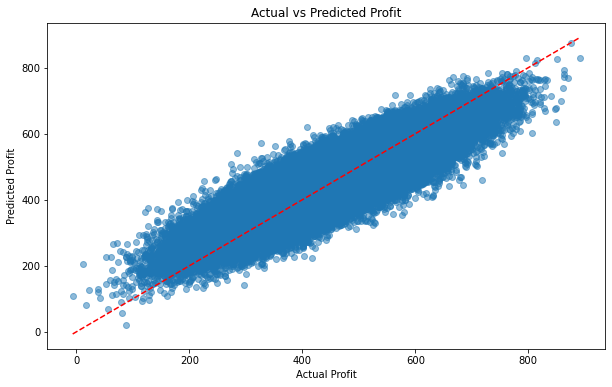

You’ve now taken a raw dataset, cleaned it, built a model, and visualized the results.


In [8]:
# 📘 Regression Case Study: Step-by-Step Guide for Beginners

# 📦 Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.impute import SimpleImputer

# 📂 Load Dataset
df = pd.read_csv("regression_data.csv")

# 🙀 First Look at the Data
print(df.head())
print(df.info())
print(df.describe())

# ✅ Drop Irrelevant Columns (if any)
# df.drop(columns=['Internal_Notes'], inplace=True)  # Example placeholder if irrelevant columns exist

# ✅ Check and Remove Duplicates
df = df.drop_duplicates()

# 🔍 Step 1: Visualize Distributions (EDA)
plt.figure(figsize=(10, 6))
clean_target = df['dependent_var'].replace([np.inf, -np.inf], np.nan).dropna()
plt.hist(clean_target, bins=30, edgecolor='black')
plt.title("Distribution of Target Variable")
plt.xlabel("dependent_var")
plt.ylabel("Frequency")
plt.show()

# 📊 Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# ✅ Impute Missing Values (Median for skewed variables, Mean for others)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].skew() > 1 or df[col].skew() < -1:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)

# ✅ Cap Outliers with IQR Method
for col in df.columns:
    if col != 'dependent_var':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# 📊 Correlation Matrix Again After Cleaning
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Cleaned Correlation Matrix")
plt.show()

# 📊 Define Predictors and Target for OLS
X = df.drop(columns=['dependent_var'])
y = df['dependent_var']
X = sm.add_constant(X)

# 📊 Fit OLS Model
model = sm.OLS(y, X).fit()
print(model.summary())

# 🔍 Add Predictions
df['Predicted_Profit'] = model.predict(X)

# 📈 Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(df['dependent_var'], df['Predicted_Profit'], alpha=0.5)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

# 🧰 Final Insight
print("You’ve now taken a raw dataset, cleaned it, built a model, and visualized the results.")